<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jisha_Obukwelu_DSPT5_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#Create sales list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
#Find total
total = sum(sales)

**Mean**

In [4]:
#Mean = total/len(sales)
mean_sales = total/len(sales)
print(f'Sales means:{mean_sales:.2f}')

Sales means:3052.71


**Variance**

$$v = \frac{\sum(X_i - \overline{X})^2}{N}$$

This is a lot of steps without using numpy.

In [5]:
#1. Find the difference between the sales numbers and mean for each number
sales_mean_diff = []

for i in sales:
  diff = i - mean_sales
  sales_mean_diff.append(diff)

sales_mean_diff

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [6]:
#2. Square those differences
diff_squared = []

for i in sales_mean_diff:
  squared_sales = i**2
  diff_squared.append(squared_sales)

diff_squared

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [7]:
#3. Find the sum of those differences
total = 0

for ele in range(0, len(diff_squared)): 
    total = total + diff_squared[ele]

total

1286327.4285714284

In [8]:
#4. Divide this by the total number of observations

variance = total/len(sales)
variance

183761.06122448976

**Standard Deviation**

$$\sigma = \sqrt {\frac{1}{N} \sum_{i=1}^{N_1}(x_i - \mu)^2}$$
or $$\sqrt{variance}$$

In [9]:
square_root = variance**0.5
square_root

428.67360686714756

**Function to find Mean, Variance, and Standard Deviation**

In [0]:
def findMean(numbers):
  '''
  This functions finds the mean or average of a set of numbers
  It finds the sum and then divides by the count of numbers 
  '''
  return sum(numbers)/len(numbers)

def findVariance(numbers):
  '''
  This functions finds the variance.
  It finds the difference between the number and mean, 
  and then squares this. This is then divided by the 
  total number of observations.
  '''
  m = findMean(numbers)
  return sum([(i - m)**2 for i in numbers])/len(numbers)

def findStandardDeviation(numbers):
  '''
  This function finds the standard deviation.
  This is calcalated by finding the square root of the variance, 
  which is found using the findVariance function.
  '''
  return findVariance(numbers)**0.5

def MVSd(numbers):
  '''
  This function returns a dictionary, 
  utilizing the findMean, findVariance, 
  and findStandardDeviation function.
  '''
  mvsd_dict = {
      'Mean': findMean(numbers),
      'Variance':findVariance(numbers),
      'Standard Deviation': findStandardDeviation(numbers)
  }
  return mvsd_dict

In [11]:
MVSd(sales)

{'Mean': 3052.714285714286,
 'Standard Deviation': 428.67360686714756,
 'Variance': 183761.06122448976}

**Code Check**

In [12]:
print(f'Mean: {np.mean(sales)}')
print(f'Variance: {np.var(sales)}')
print(f'Standard Deviation: {np.std(sales)}')

Mean: 3052.714285714286
Variance: 183761.06122448976
Standard Deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

**Covariance**

$$\sigma(x,y) = \sqrt {\frac{1}{N} \sum_{i=1}^{N_1}(x_i - \overline{x})(y_i - \overline{y})}$$


In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [14]:
print(f'Covariance: {np.cov(sales, customers, ddof=0)[0][1]}')

Covariance: 6518.020408163265


In [0]:
def findCovariance(a, b):
  '''
  This function finds the covariance between two random variables.
  It uses the findMean function to find the means of both variables. 
  Then it sums the difference between the variable and the means and 
  then divides by the total number of observations.
  '''
  a_mean = findMean(a)
  b_mean = findMean(b)

  return sum([(a[i]-a_mean)*(b[i]-b_mean)for i in range(0, len(a))])/len(a)

In [16]:
(f'Covariance: {findCovariance(sales, customers)}')

'Covariance: 6518.020408163265'

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

**Correlation Coefficient**

In [0]:
def findCorrelationCoefficient(a, b):
  covariance = findCovariance(a,b)
  sigma_a = findStandardDeviation(a)
  sigma_b = findStandardDeviation(b)
  return covariance/(sigma_a*sigma_b)

In [18]:
print(f'Standard Deviation of customers {findStandardDeviation(customers)}')
print(f'Correlation Coefficient {findCorrelationCoefficient(sales,customers)}')

Standard Deviation of customers 15.792015549069118
Correlation Coefficient 0.9628339778148909


**Code Check**

In [19]:
print(f'Standard Deviation of customers {np.std(customers)}')
print(f'Correlation Coefficient {np.corrcoef(sales,customers)[0][1]}')

Standard Deviation of customers 15.792015549069118
Correlation Coefficient 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [22]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [23]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

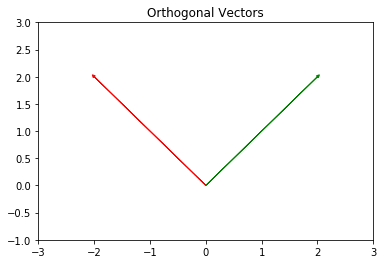

In [25]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

Orthogonal is a synonym for perpendicular. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [26]:
a = [-5, 3, 7]
b = [6, -8, 2]
np.dot(a, b)

-40

These two vectors are not orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [27]:
c = np.array([2, -15, 6, 20])

print(f'Norm of vector: {np.linalg.norm(c)**2}')
print(f'Square C: {np.dot(c, c)}')
print(f'Transpose c x c: {np.dot(c.T, c)}')

Norm of vector: 665.0
Square C: 665
Transpose c x c: 665


These different computations are all means of finding the magnitude of length of the vector.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\ 0 \end{bmatrix} + 11\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix} + -8\begin{bmatrix} 0\\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [28]:
f = np.array([4, 12, 11, 9, 2])

unit_f = []
for i in f:
  units = i/np.linalg.norm(f)
  unit_f.append(units)

unit_f

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

Manual calculation
\begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2+ 9^2 +2^2} 
\end{align}

\begin{align}
 = \sqrt{16 + 144 + 121 + 81 + 4} = \sqrt{366} = 19.13
\end{align}

\begin{align}
\hat{f} = \frac{1}{||f||}f = \frac{1}{19.13}\begin{bmatrix} 4 & 12 & 11 & 9 & 2\end{bmatrix}  
\end{align}

\begin{align}
=\begin{bmatrix} \frac{4}{19.13} & \frac{12}{19.13} & \frac{11}{19.13} & \frac{9}{19.13} & \frac{2}{19.13} \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

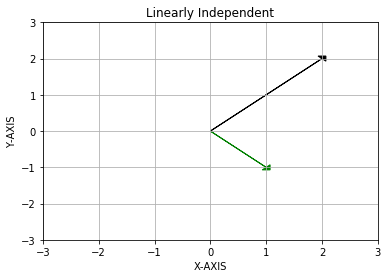

In [29]:
#plot 2 linearly independent vectors
v_1 = [2, 2]
v_2 = [1, -1]

plt.arrow(0,0, v_1[0], v_1[1], head_width = 0.2, head_length = 0.1, color = 'k')
plt.arrow(0,0, v_2[0], v_2[1], head_width = 0.2, head_length = 0.1, color = 'g')

#Graph
plt.title ('Linearly Independent')
plt.axis ([-3, 3, -3, 3])
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.grid(True)
plt.show()

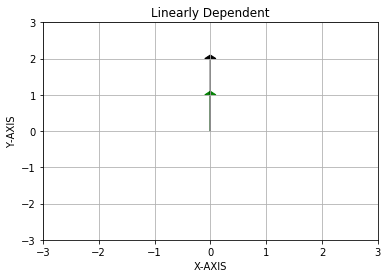

In [30]:
#plot 2 linearly dependent vectors
v_3 = [0, 1]
v_4 = [0, 2]

plt.arrow(0,0, v_3[0], v_3[1], head_width = 0.2, head_length = 0.1, color = 'g')
plt.arrow(0,0, v_4[0], v_4[1], head_width = 0.2, head_length = 0.1, color = 'k')

#Graph
plt.title ('Linearly Dependent')
plt.axis ([-3, 3, -3, 3])
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.grid(True)
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

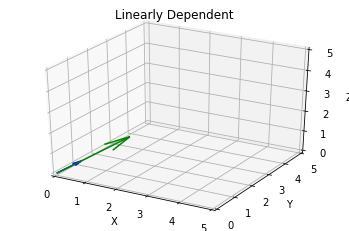

In [32]:
#Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0, 0, 3, 3, 3, length=.5, color ='g')
ax.quiver(0,0, 0, 1, 1, 1, length=.5, color ='b')

plt.title ('Linearly Dependent')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

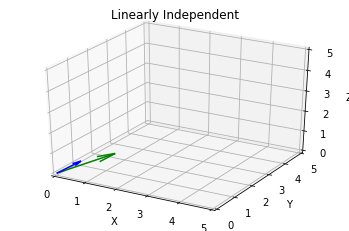

In [33]:
#Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0, 0, 2, 3, 1, length=.5, color ='g')
ax.quiver(0,0, 0, 1, 1, 1, length=.5, color ='b')

plt.title ('Linearly Independent')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = [1,2]
h = [4,8]



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]



# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



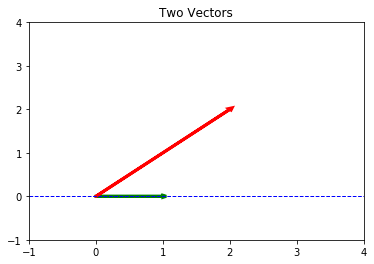

In [36]:
#Axes Bound
plt.xlim(-1,4)          
plt.ylim(-1,4)

# Original Vector
v = [1,0] 
w = [2,2]

#Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

#Plot Vectors that Form the Basis for R2
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Two Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space $\mathbb{R}^2$, are a set of vectors that are linearly independent and span the vector space.



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [37]:
P = np.matrix('1 2 3; -1 0 7; 4 8 2')
print('Rank of P', np.linalg.matrix_rank(P))

Rank of P 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns, these columns must be independent of each other. A matrix can can have 3x3 matrix that does not span into the $\mathbb{R}^3$ space but for matrix P, it actually does take a 3 dimensional space.

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

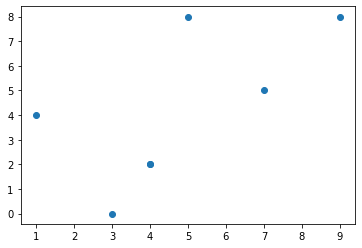

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

[2.5, 3.0, 6.0, 1.5, 8.5, 3.0, 6.5]
[2.5, 3.0, 6.0, 1.5, 8.5, 3.0, 6.5]


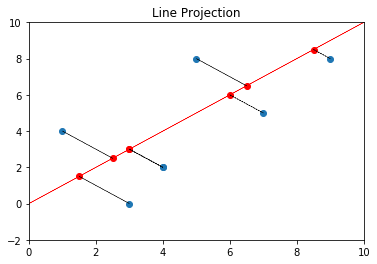

In [44]:
xs =  np.array([1, 4, 7, 3, 9, 4, 5], dtype=np.float64)
ys =  np.array([4, 2, 5, 0, 8, 2, 8], dtype=np.float64)
line = np.array([10,10], dtype=np.float64)

def projection(w,v):
  return np.dot(w,v)/np.dot(v, v)*v

x_proj = []
y_proj = []

for point in zip(xs, ys):
  proj = projection(point, line)
  x_proj.append(proj[0])
  y_proj.append(proj[1])

print(x_proj)
print(y_proj)

# plotting
fig, ax = plt.subplots()

ax.scatter(xs, ys)
ax.scatter(x_proj, y_proj, c='red')
plt.arrow(0, 0, line[0], line[1], linewidth=0.5,  color = 'red')

plt.title("Line Projection")


for line in zip(xs, ys, x_proj, y_proj):
  plt.arrow(line[0], line[1], line[2]-line[0], line[3]-line[1], 
            linewidth=0.5, 
            linestyle = '--', 
            color = 'black')
  
plt.xlim(0, 10)
plt.ylim(-2, 10)
plt.show()

# Linear Projections

## Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

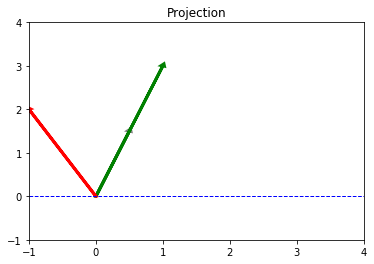

In [40]:
#Axes Bound
plt.xlim(-1,4)          
plt.ylim(-1,4)

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])
proj = np.dot(v,w)/np.dot(v,v)*v
x_minus_proj = w-proj

#Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

#Plot Vectors that Form the Basis for R2
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Projection")
plt.show()